# 基础理论部分


2.1. what do you want to acquire in this course？ I want to master the NLP knowledge system and use relevant algorithms to solve practical projects, another is ability to read English paper. Of course, the most important thing is the thinking of artificial intelligence and the way to solve problems.

2.2. what problems do you want to solve？ Human-computer intelligent dialogue 2.3. what’s the advantages you have to finish you goal? I have some knowledge of python. I am also looking at machine learning and deep learning. And so I have a certain amount of time and energy to study NLP.

2.4. what’s the disadvantages you need to overcome to finish you goal? Need to understand the knowledge of data structures and algorithms to improve AI thinking and the ability to solve business problems

2.5. How will you plan to study in this course period? Follow the teacher to learn the overall knowledge framework, and think about how to apply it in my business scenarios, learn with relevant questions, and have a deep understanding of the underlying and detailed aspects of NLP.


#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans:1、Chat robot 2、Autopilot 3、Medical health

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

使用git进行版本管理，和代码的Push 和pull,git文档有详细的操作说明：https://git-scm.com/book/zh/v2 ；jupyter可以方便的进行代码的演示和操作，Pycharm是python的，IDE在实际项目开发中常使用

#### 2. What's the Probability Model?

Ans:通过对大量语料进行统计分析，计算每个词或词组出现的概率，进而判断句子的概率和合理性等

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:垃圾邮件分类

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:语言规则比较难整理，而且有的不是很规范，很难形成一条完整的规则，词典维护起来也比较困难

#### 5. What's the Language Model;

Ans:根据语言客观事实而进行的语言抽象数学建模，是一种对应关系

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:人机对话、机器翻译、信息检索、语音识别

#### 7. What's the 1-gram language model;

Ans:一元模型，各个词之间是相互独立的，与句中词序无关，这时，整个句子的概率等于各个词语概率的乘积。

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:优势是降低了计算的复杂度，劣势是没有考虑词序之间的影响和顺序，效果不是很好

#### 9. What't the 2-gram models;

Ans:二元模型，考虑当前词只和前面一个词出现的概率有关

# 编程实践部分

# 1、设计句子生成器

In [8]:
import pandas as pd
import numpy as np
import random

In [148]:
#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [10]:
def create_grammer(grammer_str,split = '=>',line_split = '\n'):
    grammer = {}
    for line in grammer_str.split(line_split):   # 按行读取
        # print(line)
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammer[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammer

In [13]:
choice = random.choice
def generate(gram,target):
    if target not in gram:
        return target
    # print(gram[target])
    expaned = [generate(gram,t) for t in choice(gram[target])]
    # print(expaned)
    
    return ''.join([e if e!='/n' else '\n' for e in expaned if e != 'null'])


In [134]:
# 随机生成多个句子
def generate_n(n):
    results = []
    for i in range(n):
        result = generate(gram=create_grammer(host,split='='),target = 'host')
        results.append(result)
        #print(result)
    return results

In [135]:
generate_n(5)

['你好我是6326号,您需要赌博吗？',
 '小朋友,你好我是37721号,请问你要打牌吗？',
 '您好我是51号,请问你要喝酒吗？',
 '先生,你好我是6号,请问你要喝酒吗？',
 '你好我是1号,您需要赌博吗？']

# 2、使用新数据源完成语言模型的训练

In [16]:
# 导入所用的包
import pandas as pd
import numpy as np


In [17]:
# 加载豆瓣评论数据集
file_name =r'./datasource/movie_comments.csv'

In [20]:
data = pd.read_csv(file_name,sep=',')

C:\Users\LuoGU\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [25]:
# 提取评论数据
comment_data = data['comment'].tolist()

In [26]:
len(comment_data)

261497

In [28]:
comment_data[:10]

['吴京意淫到了脑残的地步，看了恶心想吐',
 '首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮番上场，视物理逻辑于不顾，不得不说有钱真好，随意胡闹',
 '吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋律，为了煽情而煽情，让人觉得他是个大做作、大谎言家。（7.29更新）片子整体不如湄公河行动，1.整体不够流畅，编剧有毒，台词尴尬；2.刻意做作的主旋律煽情显得如此不合时宜而又多余。',
 '凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。',
 '中二得很',
 '“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。',
 '脑子是个好东西，希望编剧们都能有。',
 '三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心，他终于抛弃李忠志了，新增外来班底让硬件实力有机会和国际接轨，开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶，在理念上，它甚至做到《绣春刀2》最想做到的那部分。',
 '开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪下实打实的真刀真枪 让人不禁热血沸腾 特别弹簧床架挡炸弹 空手接碎玻璃 弹匣割喉等帅得飞起！就算前半段铺垫节奏散漫主角光环开太大等也不怕 作为一个中国人 两个小时弥漫着中国强大得不可侵犯的氛围 还是让那颗民族自豪心砰砰砰跳个不停。',
 '15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个人，无能的政府需要求助于这些英雄才能解决难题，体现的是个人的价值，所以主旋律照抄这种模式实际上是有问题的。我们以前嘲笑个人英雄主义，却没想到捆绑爱国主义的全能战士更加难以下咽。']

In [61]:
# 对文本进行清洗
import re
def token(string):
    # 剔除特殊符号
    pattern = re.compile(u'\t|\n|-|:|;|\)|\(|\?|"')   # 定义正则表达式匹配模式
    string_data = re.sub(pattern, '', string) # 将符合模式的字符去除
    return string_data

comment_clean = [''.join(token(str(a))) for a in comment_data]

In [62]:
comment_clean[:10]

['吴京意淫到了脑残的地步，看了恶心想吐',
 '首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮番上场，视物理逻辑于不顾，不得不说有钱真好，随意胡闹',
 '吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋律，为了煽情而煽情，让人觉得他是个大做作、大谎言家。（7.29更新）片子整体不如湄公河行动，1.整体不够流畅，编剧有毒，台词尴尬；2.刻意做作的主旋律煽情显得如此不合时宜而又多余。',
 '凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。',
 '中二得很',
 '“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。',
 '脑子是个好东西，希望编剧们都能有。',
 '三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心，他终于抛弃李忠志了，新增外来班底让硬件实力有机会和国际接轨，开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶，在理念上，它甚至做到《绣春刀2》最想做到的那部分。',
 '开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪下实打实的真刀真枪 让人不禁热血沸腾 特别弹簧床架挡炸弹 空手接碎玻璃 弹匣割喉等帅得飞起！就算前半段铺垫节奏散漫主角光环开太大等也不怕 作为一个中国人 两个小时弥漫着中国强大得不可侵犯的氛围 还是让那颗民族自豪心砰砰砰跳个不停。',
 '15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个人，无能的政府需要求助于这些英雄才能解决难题，体现的是个人的价值，所以主旋律照抄这种模式实际上是有问题的。我们以前嘲笑个人英雄主义，却没想到捆绑爱国主义的全能战士更加难以下咽。']

In [30]:
import jieba

In [114]:
def cut(string): 
    return list(jieba.cut(string))

In [65]:
# 对数据进行分词
from collections import Counter
TOKEN=[]
for i in comment_clean:
    TOKEN += cut(str(i))
    

In [87]:
object_list = []
remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',
                u'通常',u'如果',u'我们',u'需要',u'！',u'…',u'~',u'《',u'》',u'“',u'”',u'？'] # 自定义去除词库

In [88]:
# 去除停用词
for i in TOKEN:
    if i not in remove_words:
        object_list.append(i)

In [89]:
word_count = Counter(object_list)

In [97]:
word_count.most_common()

[('我', 49981),
 ('很', 34682),
 ('看', 34362),
 ('电影', 33753),
 ('也', 32055),
 ('不', 28447),
 ('有', 27969),
 ('就', 25662),
 ('人', 24216),
 ('好', 23224),
 ('啊', 20858),
 ('还', 17504),
 ('一个', 17343),
 ('你', 17229),
 ('这', 16932),
 ('还是', 16426),
 ('但', 15497),
 ('故事', 15050),
 ('没有', 14344),
 ('.', 14284),
 ('就是', 14016),
 ('喜欢', 13561),
 ('让', 13328),
 ('太', 12921),
 ('又', 11556),
 ('剧情', 11373),
 ('没', 10867),
 ('说', 10792),
 ('吧', 10752),
 ('他', 10642),
 ('不错', 10416),
 ('到', 10354),
 ('给', 10316),
 ('上', 10115),
 ('得', 10094),
 ('这个', 10056),
 (',', 10048),
 ('被', 9937),
 ('最后', 9694),
 ('一部', 9691),
 ('片子', 9594),
 ('什么', 9565),
 ('多', 9220),
 ('与', 9163),
 ('可以', 8972),
 ('不是', 8792),
 ('最', 8638),
 ('觉得', 8626),
 ('导演', 8379),
 ('自己', 8355),
 ('拍', 8195),
 ('要', 8092),
 ('好看', 8063),
 ('真的', 7915),
 ('感觉', 7829),
 ('里', 7773),
 ('但是', 7720),
 ('会', 7498),
 ('有点', 7480),
 ('想', 7470),
 ('那', 7450),
 ('这部', 7434),
 ('去', 7320),
 ('把', 7155),
 ('着', 6989),
 ('这么', 6780),
 ('小', 6658),

In [85]:
from wordcloud import WordCloud
wc = WordCloud(max_words=200)

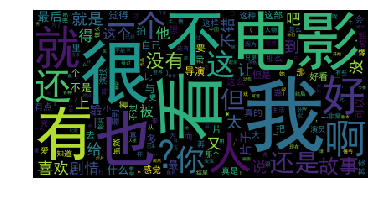

In [86]:
# 词频展示
import matplotlib.pyplot as plt
from PIL import Image
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
    max_words=200, # 最多显示词数
    max_font_size=100 # 字体最大值
)

wc.generate_from_frequencies(word_count) # 从字典生成词云

plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

In [92]:
# 查看单个词出现的概率
def prob_word(word):
    return word_count[word]/len(object_list)

In [93]:
prob_word('好看')

0.002001217657674383

In [95]:
prob_word('可乐')

1.8118428501826857e-05

# 3、获得最优质的语言


In [175]:
# 电影观后场景定义

movie = """
comment = 自己 想法 人物 评论
自己 = 称谓 
称谓 = 我 | 我们 | 他
想法 = 认为 | 感觉 | 觉得 
人物 = 导演 | 男一 | 女一 | 男一号 | 女一号 
评论 = 演技 | 内容 
演技 = 不错 | 在线 
内容 = 煽情 | 爱国
"""


In [170]:
def generate_n(n):
    results = []
    for i in range(n):
        result = generate(gram=create_grammer(movie,split='='),target = 'comment')
        results.append(result)
        #print(result)
    return results

In [159]:
TOKEN_2_GRAM = [''.join(object_list[i:i+2]) for i in range(len(object_list[:-2]))]

In [160]:
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到脑残', '脑残地步', '地步看', '看恶心', '恶心想', '想吐', '吐首映礼', '首映礼看']

In [101]:
word_count_2 = Counter(TOKEN_2_GRAM)

In [102]:
word_count_2.most_common()

[('让人', 5290),
 ('看完', 3925),
 ('让我', 3284),
 ('这部电影', 2722),
 ('!!', 2702),
 ('很好', 2686),
 ('··', 2627),
 ('不知道', 2545),
 ('★★', 2400),
 ('我觉得', 1986),
 ('还不错', 1958),
 ('——', 1894),
 ('很有', 1851),
 ('也很', 1753),
 ('不喜欢', 1631),
 ('很喜欢', 1583),
 ('也不', 1541),
 ('我也', 1458),
 ('我就', 1383),
 ('这片子', 1367),
 ('就像', 1323),
 ('太多', 1319),
 ('一个人', 1315),
 ('很不错', 1306),
 ('去看', 1301),
 ('我喜欢', 1186),
 ('还可以', 1175),
 ('==', 1161),
 ('我看', 1137),
 ('还是很', 1109),
 ('也有', 1108),
 ('最喜欢', 1079),
 ('每个人', 1072),
 ('电影里', 1070),
 ('一部电影', 1064),
 ('牛逼', 1062),
 ('我想', 1062),
 ('看得', 1026),
 ('真的很', 1022),
 ('也就', 1008),
 ('我不', 985),
 ('三星半', 973),
 ('很好看', 958),
 ('挺好', 956),
 ('这就是', 923),
 ('不好看', 870),
 ('这电影', 867),
 ('拍得', 859),
 ('看电影', 857),
 ('//', 853),
 ('更多', 833),
 ('傻逼', 825),
 ('还算', 824),
 ('这部片子', 809),
 ('还行', 800),
 ('也没', 781),
 ('很美', 771),
 ('1.', 757),
 ('2.', 753),
 ('就好', 749),
 ('并不', 745),
 ('我还是', 726),
 ('也没有', 711),
 ('好电影', 702),
 ('我很', 701),
 ('我还', 695),
 ('没看'

In [117]:
# 两个词出现的概率
def prob_words(word1,word2):
    if word1+word2 in word_count_2:
        return word_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [190]:
# 运用n-gram模型，计算句子的概率
def prob_sentence(sentence):
    # 对句子进行分词
    words = cut(sentence)
    #print(words)
    sentence_prob=1
    # 计算概率
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        proba = prob_words(word,next_)
        # print(proba)
        
        sentence_prob *=proba
    return sentence_prob

In [191]:
prob_sentence('我喜欢自然语言处理')

1.813336214449666e-17

In [178]:
def generate_best():
    n_content = []
    sentences = generate_n(10)
    # 计算产生的10个句子的概率
    for i in sentences:
        sentences = i
        prob = prob_sentence(i)
        n_content.append((sentences,prob))
    print(n_content)
    # 对概率进行排序，取出最大的语句
    max_prob_setence = sorted(n_content, key=lambda x: x[1], reverse=True)
    return max_prob_setence[0]
    

In [179]:
generate_best()

[('我认为男一号在线', 1.758293968479861e-18), ('我们认为男一号在线', 1.5289512769390096e-20), ('我们感觉男一在线', 1.5289512769390096e-20), ('我们感觉女一号爱国', 1.5289512769390096e-20), ('我感觉导演爱国', 1.5191659887666006e-16), ('我们感觉导演爱国', 7.338966129307248e-19), ('我觉得导演爱国', 9.716791155202794e-16), ('他认为男一爱国', 9.17370766163406e-20), ('我们觉得男一号煽情', 1.5289512769390096e-20), ('我认为女一号爱国', 1.758293968479861e-18)]


('我觉得导演爱国', 9.716791155202794e-16)